In [36]:
#Importing Libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [37]:
#Loading Dataset
data = pd.read_csv('Housing_dataset.csv')

In [38]:
#Printing dataset
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [39]:
#Checking information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [40]:
#Checking Describsion of dataset
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [41]:
#Checking for any NULL values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [42]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for column in binary_columns:
    data[column] = data[column].map({'yes': 1, 'no': 0})

data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

In [43]:
#Extracting x and y
x=data.drop('parking',axis=1)
y=data['price']

In [44]:
#Extracting features of x 
x_fea=data[['area','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea','area',]]
y=data['price']

In [45]:
#Display x features
x_fea

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,area
0,7420,1,0,0,0,1,1,7420
1,8960,1,0,0,0,1,0,8960
2,9960,1,0,1,0,0,1,9960
3,7500,1,0,1,0,1,1,7500
4,7420,1,1,1,0,1,0,7420
...,...,...,...,...,...,...,...,...
540,3000,1,0,1,0,0,0,3000
541,2400,0,0,0,0,0,0,2400
542,3620,1,0,0,0,0,0,3620
543,2910,0,0,0,0,0,0,2910


In [46]:
#Data Splitting
x_train,x_test,y_train,y_test=train_test_split(x_fea,y,test_size=0.2,random_state=42)

In [47]:
#Display x_train
x_train

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,area
46,6000,1,0,0,0,1,0,6000
93,7200,1,0,1,0,1,0,7200
335,3816,1,0,1,0,1,0,3816
412,2610,1,0,1,0,0,1,2610
471,3750,1,0,0,0,0,0,3750
...,...,...,...,...,...,...,...,...
71,6000,1,0,0,0,1,0,6000
106,5450,1,0,1,0,1,1,5450
270,4500,1,0,0,1,0,0,4500
435,4040,1,0,0,0,0,0,4040


In [48]:
#Setting up model
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [49]:
y_pred = model.predict(x_test)

In [50]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

Mean Squared Error (MSE): 3288995952181.45
R-squared (R²) Score: 0.35


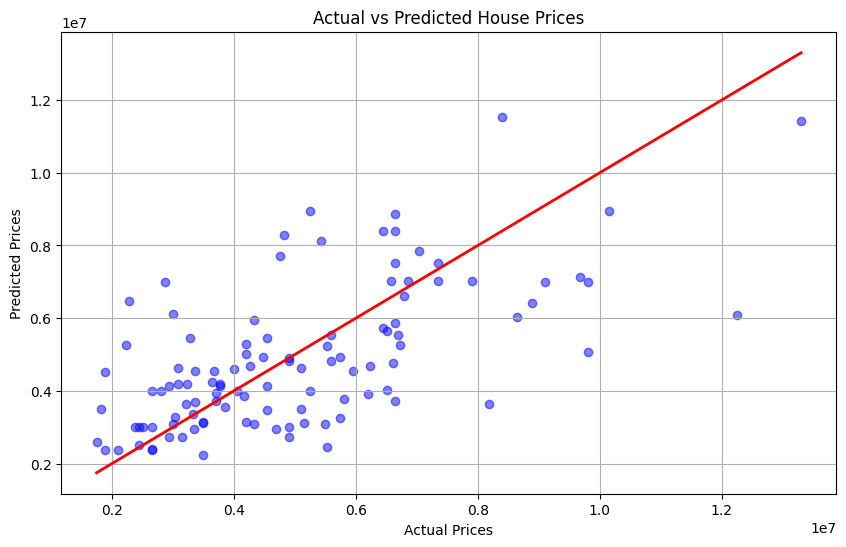

In [57]:
#Plotting the 
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

In [52]:
#Prediction
y_pred=model.predict(x_test)

In [53]:
y_pred

array([ 3990000.        ,  5880000.        ,  3722600.        ,
        5740000.        ,  3990000.        ,  2730000.        ,
        8960000.        ,  5449500.        ,  2520000.        ,
        2940000.        ,  8960000.        ,  3990000.        ,
        4550000.        ,  3703000.        ,  6475000.        ,
        2408000.        ,  2380000.        ,  7035000.        ,
        4130000.        ,  7000000.        ,  5250000.        ,
        8120000.        ,  4515000.        ,  3990000.        ,
        5005000.        ,  6083000.        ,  4620000.        ,
        4620000.        ,  7000000.        ,  2993666.66666667,
        6615000.        ,  3150000.        ,  7507500.        ,
        2730000.        ,  3360000.        ,  5285000.        ,
        4900000.        ,  5460000.        ,  3115000.        ,
        3010000.        ,  3087000.        ,  4550000.        ,
        8855000.        ,  4830000.        ,  2730000.        ,
        4935000.        ,  7035000.     